In [2]:
%matplotlib inline
import osmnx as ox, matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
ox.config(log_console=True, use_cache=True)

<function matplotlib.pyplot.show>

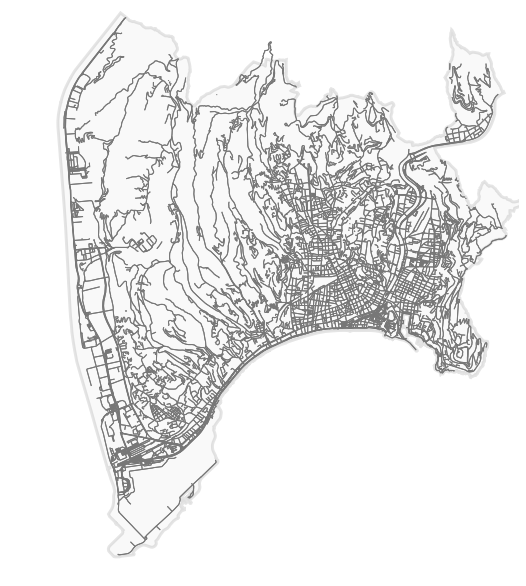

In [5]:
gdf = ox.gdf_from_place('Nice, France')
gdf = ox.project_gdf(gdf)

G = ox.graph_from_place('Nice, France', network_type='walk', retain_all=True)
G = ox.project_graph(G)

fig, ax = ox.plot_graph(G, fig_height=10, show=False, node_size=0, close=False, edge_color='#777777')

for geometry in gdf['geometry'].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc='#cccccc', ec='k', linewidth=3, alpha=0.1, zorder=-1)
            ax.add_patch(patch)

plt.show

In [ ]:
Nancy = ox.gdf_from_place('Nancy, France')
ox.save_gdf_shapefile(Nancy)